# 6.1 Machine Learning Fundamentals

__[pretty display of variables](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)__

```python
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pydataset import data
quakes = data('quakes')
quakes.head()
quakes.tail()
```


#### 1. Introduction To K-Nearest Neighbors
    
    Learn the basics of machine learning to suggest optimal AirBnB list prices
    * The basics of the machine learning workflow
    * How the k-nearest neighbors algorithm works
    * The role of Euclidan distance in machine learning
    
#### 2. Evaluation Model Performance

    Learn how to test models using error metrics and simple validation
    * How to evaluate model accuracy using MSE and RMSE
    * How to compare MSE and RMSE values

#### 3. Multivariate K-Nearest Neighbors (Feature Selection)

    Improve your predictions by using more features
    * How to use multiple variables in machine learning models
    * How to prepare columns by normalizeing and handling missing values

#### 4. Hyperparameter Optimization (Optimal K value)

    Vary the k value to improve performance
    * How a model's hyoerparameters affect the models's performance
    * How to use grid search to try different hyperparameter values

#### 5. Cross Validation

    Learn how to use k-fold cross validation to perform more rigorous testing
    * How cross-validation lets us more accuractely understand model performance
    * The difference between holdout and k-fold cross validation
    * How to perform cross-validation in scikit-learn

#### 6. Guided Project: Predicting Car Prices

    Practice the machine learning workflow using k-nearest neighbors to predict car prices
    * Cleaning data in preparation for machine learning
    * iterating on k-nearest neighbors models
    



## 6.1.1 Introduction to K-Nearest Neighbors



### 6.1.1.1 Problem definition

AirBnB is a marketplace for short term rentals that allows you to list part or all of your living space for others to rent. You can rent everything from a room in an apartment to your entire house on AirBnB. Because most of the listings are on a short-term basis, AirBnB has grown to become a __popular alternative to hotels__. The company itself has grown from it's founding in 2008 to a __[30 billion dollar valuation in 2016](https://www.bloomberg.com/news/articles/2016-08-05/airbnb-files-to-raise-850-million-at-30-billion-valuation)__ and is currently worth more than any hotel chain in the world.

One challenge that hosts looking to rent their living space face is __determining the optimal nightly rent price__. In many areas, renters are presented with a good selection of listings and can filter on criteria like price, number of bedrooms, room type and more. Since AirBnB is a marketplace, the amount a host can charge on a nightly basis is closely linked to the __dynamics of the marketplace__. Here's a screenshot of the search experience on AirBnB:

![img alt](https://s3.amazonaws.com/dq-content/airbnb.png)

As a host, if we try to charge above market price for a living space we'd like to rent, then renters will select more affordable alternatives which are similar to ours.. If we set our nightly rent price too low, we'll miss out on potential revenue.

One strategy we could use is to:

* find a few listings that are similar to ours,
* average the listed price for the ones most similar to ours,
* set our listing price to this __calculated average price__.

The process of __discovering patterns__ in existing data to make a __prediction__ is called __machine learning__. In our case, we want to use data on local listings to predict the optimal price for us to set. In this mission, we'll explore a specific machine learning technique called __k-nearest neighbors__, which mirrors the strategy we just described. Before we dive further into machine learning and k-nearest neighbors, let's get familiar with the dataset we'll be working with.

### 6.1.1.2 Introduction to the data

While AirBnB doesn't release any data on the listings in their marketplace, a separate group named __[Inside AirBnB](http://insideairbnb.com/get-the-data.html)__ has extracted data on a sample of the listings for many of the major cities on the website. In this post, we'll be working with their dataset from October 3, 2015 on the listings from Washington, D.C., the capital of the United States. Here's a __[direct link to that dataset](http://data.insideairbnb.com/united-states/dc/washington-dc/2015-10-03/data/listings.csv.gz)__. Each row in the dataset is a specific listing that's available for renting on AirBnB in the Washington, D.C. area

To make the dataset less cumbersome to work with, we've removed many of the columns in the original dataset and renamed the file to __dc_airbnb.csv__. Here are the columns we kept:

* host_response_rate: the response rate of the host
* host_acceptance_rate: number of requests to the host that convert to rentals
* host_listings_count: number of other listings the host has
* latitude: latitude dimension of the geographic coordinates
* longitude: longitude part of the coordinates
* zipcode: the zip code the living space resides
* state: the state the living space resides
* accommodates: the number of guests the rental can accommodate
* room_type: the type of living space (Private room, Shared room or Entire home/apt
* bedrooms: number of bedrooms included in the rental
* bathrooms: number of bathrooms included in the rental
* beds: number of beds included in the rental
* price: nightly price for the rental
* cleaning_fee: additional fee used for cleaning the living space after the guest leaves
* security_deposit: refundable security deposit, in case of damages
* minimum_nights: minimum number of nights a guest can stay for the rental
* maximum_nights: maximum number of nights a guest can stay for the rental
* number_of_reviews: number of reviews that previous guests have left

Let's read the dataset into Pandas and become more familiar with it.

#### Instructions

* Read dc_airbnb.csv into a Dataframe named dc_listings.
* Use the print function to display the first row in dc_listings.

In [1]:
import pandas as pd
dc_listings = pd.read_csv("Data/dc_airbnb.csv")
dc_listings.head(1)
# print(dc_listings.iloc[0])

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC


### 6.1.1.3 K-nearest neighbors

Here's the strategy we wanted to use:

* Find a few similar listings.
* Calculate the average nightly rental price of these listings.
* Set the average price as the price for our listing.

The k-nearest neighbors algorithm is similar to this strategy. Here's an overview:

![img alt](https://s3.amazonaws.com/dq-content/knn_infographic.png)

There are 2 things we need to unpack in more detail:

* the similarity metric
* how to choose the k value

In this mission, we'll define what similarity metric we're going to use. Then, we'll implement the k-nearest neighbors algorithm and use it to suggest a price for a new, unpriced listing. We'll use a __k value of 5__ in this mission. In later missions, we'll learn how to evaluate how good the suggested prices are, how to choose the __optimal k value__, and more.

### 6.1.1.4 Euclidean distance

The __similarity metric__ works by comparing a fixed set of numerical features, another word for attributes, between 2 observations, or living spaces in our case. When trying to predict a continuous value, like price, the main similarity metric that's used is __Euclidean distance__. Here's the general formula for Euclidean distance:

$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$

where $p_1$ to $p_n$ represent the feature values for one observation and $q_1$ to $q_n$ represent the feature values for the other observation. Here's a diagram that breaks down the Euclidean distance between the first 2 observations in the dataset using only the host_listings_count, accommodates, bedrooms, bathrooms, and beds columns:

![img alt](https://s3.amazonaws.com/dq-content/euclidean_distance_five_features.png)

In this mission, we'll use just one feature in this mission to keep things simple as you become familiar with the machine learning workflow. Since we're only using one feature, this is known as the __univariate case__. Here's how the formula looks like for the univariate case:

$d = \sqrt{(q_1 - p_1)^2} $

The square root and the squared power cancel and the formula simplifies to:

$d = | q_1 - p_1 | $

The living space that we want to rent can accommodate 3 people. Let's first calculate the distance, using just the __accommodates feature__, between the first living space in the dataset and our own.

#### Instructions

* Calculate the Euclidean distance between our living space, which can accommodate 3 people, and the first living space in the dc_listings Dataframe.
* Assign the result to first_distance and display the value using the print function.

In [2]:
import numpy as np
dc_listings.head()


,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [3]:
our_acc_value = 3
first_living_space_value = dc_listings.iloc[0]['accommodates']
first_distance = np.abs(first_living_space_value - our_acc_value)
print(first_distance)

1


### 6.1.1.5 Calculate distance for all observations

The Euclidean distance between the first row in the dc_listings Dataframe and our own living space is 1. How do we know if this is high or low? If you look at the Euclidean distance equation itself, the lowest value you can achieve is 0. This happens when the value for the feature is exactly the same for both observations you're comparing. If $p_1 = q_1$ then $d=|q_1 - p_1|$ which results in $d=0$. The closer to 0 the distance the more similar the living spaces are.

If we wanted to calculate the Euclidean distance between each living space in the dataset and a living space that accommodates 8 people, here's a preview of what that would look like.

![img alt](https://s3.amazonaws.com/dq-content/distance_between_rows_and_ours.png)

Then, we can rank the existing living spaces by ascending distance values, the proxy for similarity.

#### Instructions

* Calculate the distance between each value in the accommodates column from dc_listings and the value 3, which is the number of people our listing accommodates:
    * Use the apply method to calculate the absolute value between each value in accommodates and 3 and return a new Series containing the distance values.
* Assign the distance values to the distance column.
* Use the Series method value_counts and the print function to display the unique value counts for the distance column.

In [4]:
new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x - new_listing))
# dc_listings['distance'] = np.abs(dc_listings['accommodates'] - 3)
print(dc_listings['distance'].value_counts())

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


### 6.1.1.6 Randomizing, and sorting

It looks like there are quite a few, __461__ to be precise, living spaces that can accommodate 3 people just like ours. This means the 5 "nearest neighbors" we select after sorting all will have a distance value of 0. If we sort by the distance column and then just select the first 5 living spaces, we would be __biasing__ the result to the ordering of the dataset.

```python
>> dc_listings[dc_listings["distance"] == 0]["accommodates"]
26      3
34      3
36      3
40      3
44      3
45      3
48      3
65      3
66      3
71      3
75      3
86      3
...
```

Let's instead __randomize the ordering__ of the dataset and then sort the Dataframe by the distance column. This way, all of the living spaces with the same number of bedrooms will still be at the top of the Dataframe but will be in random order across the first 461 rows. We've already done the first step of setting the random seed, so we can perform answer checking on our end.

#### Instructions

* Randomize the order of the rows in dc_listings:
* Use the np.random.permutation() function to return a NumPy array of shuffled index values.
* Use the Dataframe method loc[] to return a new Dataframe containing the shuffled order.
* Assign the new Dataframe back to dc_listings.
* After randomization, sort dc_listings by the distance column.
* Display the first 10 values in the price column using the print function.

In [5]:
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings.sort_values(by='distance', inplace=True)
print(dc_listings.iloc[0:10]['price'])

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


### 6.1.1.7 Averge price

Before we can select the 5 most similar living spaces and compute the average price, we need to clean the price column. Right now, the price column contains comma characters (,) and dollar sign characters and is formatted as a text column instead of a numeric one. We need to remove these values and convert the entire column to the float datatype. Then, we can calculate the average price.

#### Instructions

* Remove the commas (,) and dollar sign characters (\$) from the price column:
    * Use the __[str accessor](http://pandas.pydata.org/pandas-docs/version/0.22/api.html#string-handling)__ so we can apply string methods to each value in the column followed by the string method replace to replace all comma characters with the empty character:  stripped_commas = dc_listings['price'].str.replace(',', '')
    * Repeat to remove the dollar sign characters as well.
* Convert the new Series object containing the cleaned values to the float datatype and assign back to the price column in dc_listings.
* Calculate the mean of the first 5 values in the price column and assign to mean_price.
* Use the print function or the variable inspector below to display mean_price.

In [6]:
pat = r"[\$,]" ## regular expression
dc_listings['price'] = dc_listings['price'].str.replace(pat, '').astype('float')
mean_price = dc_listings['price'][:5].mean()
print(mean_price)

156.6


### 6.1.1.8 Function to make predictions

Congrats! You've just made your first prediction! Based on the average price of other listings that accommdate 3 people, we should charge 156.6 dollars per night for a guest to stay at our living space. In the next mission, we'll dive into evaluating how good of a prediction this is.

Let's write a more general function that can suggest the optimal price for other values of the accommodates column. The dc_listings Dataframe has information specific to our living space, e.g. the distance column. To save you time, we've reset the dc_listings Dataframe to a clean slate and only kept the data cleaning and randomization we did since those weren't unique to the prediction we were making for our living space.

#### Instructions

* Write a function named __predict_price__ that can use the k-nearest neighbors machine learning technique to calculate the suggested price for any value for accommodates. This function should:

    * Take in a single parameter, new_listing, that describes the number of bedrooms.
    * We've added code that assigns dc_listings to a new Dataframe named temp_df. We used the __[pandas.DataFrame.copy() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html)__ so the underlying dataframe is assigned to temp_df, instead of just a reference to dc_listings.
    * Calculate the distance between each value in the accommodates column and the new_listing value that was passed in. Assign the resulting Series object to the distance column in temp_df.
    * Sort temp_df by the distance column and select the first 5 values in the price column. Don't randomize the ordering of temp_df.
    * Calculate the mean of these 5 values and use that as the return value for the entire predict_price function.
* Use the predict_price function to suggest a price for a living space that:

    * accommodates 1 person, assign the suggested price to acc_one.
    * accommodates 2 people, assign the suggested price to acc_two.
    * accommodates 4 people, assign the suggested price to acc_four.

In [7]:
# Brought along the changes we made to the `dc_listings` Dataframe.
dc_listings = pd.read_csv('Data/dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

def predict_price(new_listing):
    temp_df = dc_listings.copy()
    ## Complete the function.
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x-new_listing))
    temp_df.sort_values(by='distance', inplace=True)
    predicted_price = temp_df['price'][:5].mean()
    return predicted_price

acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)

prediction_list = [(x, predict_price(x)) for x in range(20)]
print(prediction_list)


[(0, 68.0), (1, 68.0), (2, 112.8), (3, 156.6), (4, 124.8), (5, 230.8), (6, 183.2), (7, 306.6), (8, 288.8), (9, 286.8), (10, 404.6), (11, 829.0), (12, 579.4), (13, 470.6), (14, 435.0), (15, 434.6), (16, 754.0), (17, 754.0), (18, 754.0), (19, 754.0)]


### Next Steps

In this mission, we explored the problem of predicting the optimal price to list an AirBnB rental for based on the price of similar listings on the site. We stepped through the entire machine learning workflow, from selecting a feature to testing the model. To explore the basics of machine learning, we limited ourselves to only using one feature (the univariate case) and a fixed __k value of 5__.

In the next mission, we'll learn how to evaluate a model's performance.

## 6.1.2 Evaluating Model Performance

### 6.1.2.1 Testing quality of predictions

We now have a function that can predict the price for any living space we want to list as long as we know the number of people it can accommodate. The function we wrote represents a __machine learning model__, which means that it outputs a prediction based on the input to the model.

A simple way to test the quality of your model is to:

* split the dataset into 2 partitions:

    * the training set: contains the majority of the rows (75%)
    * the test set: contains the remaining minority of the rows (25%)
    
* use the rows in the training set to predict the price value for the rows in the test set

    * add new column named predicted_price to the test set
    
* compare the predicted_price values with the actual price values in the test set to see how accurate the predicted values were.

This __validation process__, where we use the training set to make predictions and the test set to predict values for, is known as __train/test validation__. Whenever you're performing machine learning, you want to perform validation of some kind to ensure that your machine learning model can make good predictions on new data. While train/test validation isn't perfect, we'll use it to understand the validation process, to select an error metric, and then we'll dive into a more robust validation process later in this course.

Let's modify the predict_price function to use only the rows in the training set, instead of the full dataset, to find the nearest neighbors, average the price values for those rows, and return the predicted price value. Then, we'll use this function to predict the price for just the rows in the test set. Once we have the predicted price values, we can compare with the true price values and start to understand the model's effectiveness in the next screen.

To start, we've gone ahead and assigned the first 75% of the rows in dc_listings to train_df and the last 25% of the rows to test_df. Here's a diagram explaining the split:

![img alt](https://s3.amazonaws.com/dq-content/train_test_split.png)

#### Instructions

* Within the predict_price function, change the Dataframe that temp_df is assigned to. Change it from dc_listings to train_df, so only the training set is used.
* Use the Series method apply to pass all of the values in the accommodates column from test_df through the predict_price function.
* Assign the resulting Series object to the predicted_price column in test_df.

In [8]:
import pandas as pd
import numpy as np
dc_listings = pd.read_csv("Data/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '') ## Could use regex as well. pat = r"[\$,]"
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
train_df = dc_listings.iloc[0:2792] ##??? No randomization???
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return predicted_price

test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
test_df[['accommodates', 'price', 'predicted_price']].head()

,accommodates,price,predicted_price
2792,2,120.0,104.0
2793,3,140.0,177.4
2794,4,299.0,145.8
2795,3,85.0,177.4
2796,6,175.0,187.2


### Error Metrics

We now need a metric that quantifies how good the predictions were on the test set. This class of metrics is called an __error metric__. As the name suggests, an error metric quantifies how inaccurate our predictions were from the actual values. In our case, the error metric tells us __how off__ our predicted price values were from the actual price values for the living spaces in the test dataset.

We could start by calculating the difference between each predicted and actual value and then averaging these differences. This is referred to as __mean error__ but isn't an effective error metric for most cases. Mean error treats a positive difference differently than a negative difference, but we're really interested in how far off the prediction is in either the positive or negative direction. If the true price was 200 dollars and the model predicted 210 or 190 it's off by 10 dollars either way.

We can instead use the __mean absolute error__, where we compute the absolute value of each error before we average all the errors.

 $MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$ 
 
#### Instructions

* Use numpy.absolute() to calculate the mean absolute error between predicted_price and price.
* Assign the MAE to mae.

In [10]:
mae = np.abs(test_df['price'] - test_df['predicted_price']).mean()
mae

56.29001074113876

### 6.1.2.3 Mean Squared Error

For many prediction tasks, we want to __penalize__ predicted values that are __further away__ from the actual value much more than those that are closer to the actual value.

We can instead take the mean of the squared error values, which is called the __mean squared error or MSE__ for short. The MSE makes the gap between the predicted and actual values more clear. A prediction that's off by 100 dollars will have an error (of 10,000) that's 100 times more than a prediction that's off by only 10 dollars (which will have an error of 100).

Here's the formula for MSE:

$ MAE = \frac{1}{n} \sum_{k=1}^{n} (actual_1 - predicted_1)^{2} + \cdots + (actual_n - predicted_n)^{2} $

where n represents the number of rows in the test set. Let's calculate the MSE value for the predictions we made on the test set.

#### Instructions

* Calculate the MSE value between the predicted_price and price columns and assign to mse.

In [11]:
mse = np.power(test_df['price'] - test_df['predicted_price'], 2).mean()
mse

18646.525370569325

### 6.1.2.4 Training another model

The model we trained achieved a mean squared error of around __18646.5__. Is this a high or a low mean squared error value? What does this tell us about the __quality of the predictions__ and the model? By itself, the mean squared error value for a single model isn't all that useful.

The units of mean squared error in our case is dollars squared (not dollars), which makes it hard to reason about __intuitively__ as well. We can, however, train another model and then compare the mean squared error values to see which model performs better __on a relative basis__. Recall that a low error metric means that the gap between the predicted list price and actual list price values is low while a high error metric means the gap is high.

Let's train another model, this time using the __bathrooms column__, and compare MSE values.

#### Instructions

* Modify the predict_price function to the right to use the bathrooms column instead of the accommodates column to make predictions.
* Apply the function to test_df and assign the resulting Series object containing the predicted price values to the predicted_price column in test_df.
* Calculate the squared error between the price and predicted_price columns in test_df and assign the resulting Series object to the squared_error column in test_df.
* Calculate the mean of the squared_error column in test_df and assign to mse.
* Use the print function or the variables inspector to display the MSE value.

In [12]:
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return predicted_price

test_df['predicted_price'] = test_df['bathrooms'].apply(predict_price)
test_df['squared_error'] = np.power(test_df['price'] - test_df['predicted_price'], 2)
mse = test_df['squared_error'].mean()
print(mse)

18405.444081632548


C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


### 6.1.2.5 Root Mean Squared Error

While comparing MSE values helps us identify which model performs better on a relative basis, it doesn't help us understand if the performance is good enough in general. This is because the units of the MSE metric are squared (in this case, dollars squared). An MSE value of 16377.5 dollars squared doesn't give us an intuitive sense of how far off the model's predictions are systematically off from the true price value in dollars.

__Root mean squared error__ is an error metric whose units are the base unit (in our case, dollars). RMSE for short, this error metric is calculated by taking the square root of the MSE value:

$RMSE = \sqrt{MSE}$

Since the RMSE value uses the __same units__ as the target column, we can understand how far off in real dollars we can expect the model to perform.

Let's calculate the RMSE value of the model we trained using the __bathrooms__ column.

#### Instructions

* Calculate the RMSE value of the model we trained using the bathrooms column and assign it to rmse.

In [13]:
rmse = np.sqrt(mse)
rmse

135.66666532952209

### 6.1.2.6 Comparing MAE and RMSE

The model achieved an RMSE value of approximately 135.6, which implies that we should expect for the model to be off by 135.6 dollars on average for the predicted price values. Given that most of the living spaces are listed at just a few hundred dollars, we need to reduce this error as much as possible to improve the model's usefulness.

We discussed a few different error metrics we can use to understand a model's performance. As we mentioned earlier, these individual error metrics are helpeful for comparing models. To better understand a specific model, we can compare multiple error metrics for the same model. This requires a better understanding of the mathematical properties of the error metrics.

If you look at the equation for MAE:

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

you'll notice that that the differences between predicted and actual values grow linearly. A prediction that's off by 10 dollars has a 10 times higher error than a prediction that's off by 1 dollar. If you look at the equation for RMSE, however:

$ RMSE = \sqrt { \frac{ \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert } {n} } $

you'll notice that each error is squared before the square root of the sum of all the errors is taken. This means that the individual errors grows quadratically and has a different effect on the final RMSE value.

Let's look at an example using different data entirely. We've created 2 Series objects containing 2 sets of errors and assigned to errors_one and errors_two.

#### Instructions

* Calculate the MAE for errors_one and assign to mae_one.
* Calculate the RMSE for errors_one and assign to rmse_one.
* Calculate the MAE for errors_two and assign to mae_two.
* Calculate the RMSE for errors_two and assign to rmse_two.


In [14]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

mae_one = np.abs(errors_one).mean()
rmse_one = np.sqrt(np.power(errors_one, 2).mean())

mae_two = np.abs(errors_two).mean()
rmse_two = np.sqrt(np.power(errors_two, 2).mean())

mae = [mae_one, mae_two]
rmse = [rmse_one, rmse_two]

pd.DataFrame(data={"mae":mae, "rmse":rmse}, index=[1,2])

,mae,rmse
1,7.5,7.905694
2,62.5,235.823027


### 6.1.2.7 Next Steps

While the MAE (7.5) to RMSE (7.9056941504209481) ratio was about 1:1 for the first list of errors, the MAE (62.5) to RMSE (235.82302686548658) ratio was closer to 1:4 for the second list of errors. In general, we should expect that __the MAE value be much less than the RMSE value__. The only difference between the 2 sets of errors is the extreme 1000 value in errors_two instead of 10. When we're working with larger data sets, we can't inspect each value to understand if there's one or some outliers or if all of the errors are systematically higher. Looking at the __ratio of MAE to RMSE__ can help us understand if there are __large but infrequent errors__. You can read more about comparing MAE and RMSE in __[this wonderful post](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d#.lyc8od1ix)__.

In this mission, we learned how to test our machine learning models using basic cross validation and different metrics. In the next 2 missions, we'll explore how __adding more features__ to the machine learning model and selecting a more __optimal k value__ can help improve the model's performance.

## 6.1.3 Multivariate K-Nearest Neighbors



### 6.1.3.1 Recap

In the last mission, we explored how to use a simple k-nearest neighbors machine learning model that used __just one feature__, or attribute, of the listing to predict the rent price. We first relied on the __accommodates column__, which describes the number of people a living space can comfortably accommodate. Then, we switched to the __bathrooms column__ and observed an improvement in accuracy. While these were good features to become familiar with the basics of machine learning, it's clear that using just a single feature to compare listings doesn't reflect the reality of the market. An apartment that can accommodate 4 guests in a popular part of Washington D.C. will rent for much higher than one that can accommodate 4 guests in a crime ridden area.

There are 2 ways we can tweak the model to try to improve the accuracy (decrease the RMSE during validation):

* increase the number of attributes the model uses to calculate similarity when ranking the closest neighbors
* increase k, the number of nearby neighbors the model uses when computing the prediction

In this mission, we'll focus on increasing the number of attributes the model uses. When selecting more attributes to use in the model, we need to watch out for columns that don't work well with the distance equation. This includes columns containing:

* non-numerical values (e.g. city or state)
    * Euclidean distance equation expects numerical values
* missing values
    * distance equation expects a value for each observation and attribute
* non-ordinal values (e.g. latitude or longitude)
    * ranking by Euclidean distance doesn't make sense if all attributes aren't ordinal

In the following code screen, we've read the __dc_airbnb.csv__ dataset from the last mission into pandas and brought over the data cleaning changes we made. Let's first look at the first row's values to identify any columns containing non-numerical or non-ordinal values. In the next screen, we'll drop those columns and then look for missing values in each of the remaining columns.

#### Instructions

* Use the __[DataFrame.info]()(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)__ method to return the number of non-null values in each column.


In [15]:
import pandas as pd
import numpy as np
np.random.seed(1)

dc_listings = pd.read_csv('Data/dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [16]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
host_response_rate      3289 non-null object
host_acceptance_rate    3109 non-null object
host_listings_count     3723 non-null int64
accommodates            3723 non-null int64
room_type               3723 non-null object
bedrooms                3702 non-null float64
bathrooms               3696 non-null float64
beds                    3712 non-null float64
price                   3723 non-null float64
cleaning_fee            2335 non-null object
security_deposit        1426 non-null object
minimum_nights          3723 non-null int64
maximum_nights          3723 non-null int64
number_of_reviews       3723 non-null int64
latitude                3723 non-null float64
longitude               3723 non-null float64
city                    3723 non-null object
zipcode                 3714 non-null object
state                   3723 non-null object
dtypes: float64(6), int64(5), objec

In [17]:
dc_listings.head(5)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
574,100%,100%,1,2,Private room,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC
3091,100%,NaN,1,1,Private room,1.0,0.5,1.0,50.0,NaN,NaN,1,1125,1,38.933491,-77.029679,Washington,20010,DC
420,58%,51%,480,2,Entire home/apt,1.0,1.0,1.0,209.0,$150.00,NaN,4,730,2,38.904054,-77.051991,Washington,20037,DC
808,100%,95%,3,12,Entire home/apt,5.0,2.0,5.0,215.0,$135.00,$100.00,2,1825,34,38.906118,-76.988873,Washington,20002,DC


### 6.1.3.2 Removing features

The following columns contain __non-numerical__ values:

* room_type: e.g. Private room
* city: e.g. Washington
* state: e.g. DC

while these columns contain numerical but __non-ordinal__ values:

* latitude: e.g. 38.913458
* longitude: e.g. -77.031
* zipcode: e.g. 20009

__Geographic values__ like these aren't ordinal, because a smaller numerical value doesn't directly correspond to a smaller value in a meaningful way. For example, the zip code 20009 isn't smaller or larger than the zip code 75023 and instead both are unique, identifier values. Latitude and longitude value pairs describe a point on a geographic coordinate system and different equations are used in those cases (e.g. __[haversine](https://en.wikipedia.org/wiki/Haversine_formula)__).

While we could convert the host_response_rate and host_acceptance_rate columns to be numerical (right now they're object data types and contain the % sign), these columns describe the host and not the living space itself. Since a host could have many living spaces and we don't have enough information to uniquely group living spaces to the hosts themselves, let's avoid using any columns that don't directly describe the living space or the listing itself:

* host_response_rate
* host_acceptance_rate
* host_listings_count

Let's remove these 9 columns from the Dataframe.

#### Instructions

* Remove the 9 columns we discussed above from dc_listings:
* 3 containing non-numerical values
* 3 containing numerical but non-ordinal values
* 3 describing the host instead of the living space itself

In [18]:
drop_columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 'zipcode', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count']
dc_listings = dc_listings.drop(drop_columns, axis=1)
dc_listings.isnull().sum() ### Neat!

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

### 6.1.3.3 Handling missing values ( different scenarios for dropping columns or rows)

Of the remaining columns, 3 columns have a few missing values (less than 1% of the total number of rows):

* bedrooms
* bathrooms
* beds

Since the number of rows containing missing values for one of these 3 columns is low, we can select and __remove those rows__ without losing much information. There are also 2 columns that have a large number of missing values:

* cleaning_fee - 37.3% of the rows
* security_deposit - 61.7% of the rows

and we can't handle these easily. We can't just remove the rows containing missing values for these 2 columns because we'd miss out on the majority of the observations in the dataset. Instead, let's __remove these 2 columns entirely__ from consideration.

#### Instructions

* Drop the cleaning_fee and security_deposit columns from dc_listings.
* Then, remove all rows that contain a missing value for the bedrooms, bathrooms, or beds column from dc_listings.
* You can accomplish this by using the __[Dataframe method dropna]()(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)__ and setting the axis parameter to 0.
* Since only the bedrooms, bathrooms, and beds columns contain any missing values, rows containing missing values in these columns will be removed.
* Display the null value counts for the updated dc_listings Dataframe to confirm that there are no missing values left.

In [19]:
drop_columns = ['cleaning_fee', 'security_deposit']
dc_listings.drop(drop_columns, inplace=True, axis=1)
dc_listings.dropna(axis=0, inplace=True)
dc_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

### 6.1.3.4 Normalizing columns

Here's how the dc_listings Dataframe looks like after all the changes we made:

<table>
<tbody><tr>
<th>accommodates</th>
<th>bedrooms</th>
<th>bathrooms</th>
<th>beds</th>
<th>price</th>
<th>minimum_nights</th>
<th>maximum_nights</th>
<th>number_of_reviews</th>
</tr>
<tr>
<td>2</td>
<td>1.0</td>
<td>1.0</td>
<td>1.0</td>
<td>125.0</td>
<td>1</td>
<td>4</td>
<td>149</td>
</tr>
<tr>
<td>2</td>
<td>1.0</td>
<td>1.5</td>
<td>1.0</td>
<td>85.0</td>
<td>1</td>
<td>30</td>
<td>49</td>
</tr>
<tr>
<td>1</td>
<td>1.0</td>
<td>0.5</td>
<td>1.0</td>
<td>50.0</td>
<td>1</td>
<td>1125</td>
<td>1</td>
</tr>
<tr>
<td>2</td>
<td>1.0</td>
<td>1.0</td>
<td>1.0</td>
<td>209.0</td>
<td>4</td>
<td>730</td>
<td>2</td>
</tr>
<tr>
<td>12</td>
<td>5.0</td>
<td>2.0</td>
<td>5.0</td>
<td>215.0</td>
<td>2</td>
<td>1825</td>
<td>34</td>
</tr>
</tbody></table>

You may have noticed that while the accommodates, bedrooms, bathrooms, beds, and minimum_nights columns hover between 0 and 12 (at least in the first few rows), the values in the maximum_nights and number_of_reviews columns span much larger ranges. For example, the maximum_nights column has values as low as 4 and high as 1825, in the first few rows itself. If we use these 2 columns as part of a k-nearest neighbors model, these attributes could end up having an outsized effect on the distance calculations because of the largeness of the values.

For example, 2 living spaces could be identical across every attribute but be vastly different just on the maximum_nights column. If one listing had a maximum_nights value of 1825 and the other a maximum_nights value of 4, because of the way Euclidean distance is calculated, these listings would be considered very far apart because of the outsized effect the largeness of the values had on the overall Euclidean distance. To prevent any single column from having too much of an impact on the distance, we can __normalize all of the columns to have a mean of 0 and a standard deviation of 1__.

Normalizing the values in each column to the __[standard normal distribution](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution)__ (mean of 0, standard deviation of 1) preserves the distribution of the values in each column while aligning the scales. To normalize the values in a column to the standard normal distribution, you need to:

* from each value, subtract the mean of the column
* divide each value by the standard deviation of the column

Here's the mathematical formula describing the transformation that needs to be applied for all values in a column:

$x=\frac{x-\mu}{\sigma}$

where $x$ is a value in a specific column, $\mu$ is the mean of all the values in the column, and $\sigma$ is the standard deviation of all the values in the column. Here's what the corresponding code, using pandas, looks like:

```python
# Subtract each value in the column by the mean.
first_transform = dc_listings['maximum_nights'] - dc_listings['maximum_nights'].mean()
# Divide each value in the column by the standard deviation.
normalized_col = first_transform / first_transform.std()
```

It should be noted that you can also do the following:

```python
normalized_col = first_transform / dc_listings['maximum_nights'].std()
```

and get the same answer as above.

This is because first_transform is merely shifting the mean of the distribution and has no effect on the shape or scaling of the distribution In other words, the variance of dc_listings is the same as the variance of first_transform.

To apply this transformation across all of the columns in a Dataframe, you can use the corresponding Dataframe methods mean() and std():

```python
normalized_listings = (dc_listings - dc_listings.mean()) / (dc_listings.std())
```

These methods were written with mass column transformation in mind and when you call mean() or std(), the appropriate column means and column standard deviations are used for each value in the Dataframe. Let's now normalize all of the feature columns in dc_listings.


#### Instructions
* Normalize all of the feature columns in dc_listings and assign the new Dataframe containing just the normalized feature columns to normalized_listings.
* Add the price column from dc_listings to normalized_listings.
* Display the first 3 rows in normalized_listings.

In [20]:
normalized_listings = (dc_listings - dc_listings.mean())/dc_listings.std()
normalized_listings['price'] = dc_listings['price']

normalized_listings.head(3)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505


### 6.1.3.5 Euclidean distance for multivariate case

In the last mission, we trained 2 __univariate__ k-nearest neighbors models. The first one used the __accommodates__ attribute while the second one used the __bathrooms__ attribute. Let's now train a model that uses both attributes when determining how similar 2 living spaces are. Let's refer to the Euclidean distance equation again to see what the distance calculation __using 2 attributes__ would look like:

$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$

Since we're using 2 attributes, the distance calculation would look like:

$d = \sqrt{(accommodates_1-accommodates_2)^2 + (bathrooms_1-bathrooms_2)^2 }$

To find the distance between 2 living spaces, we need to calculate the squared difference between both accommodates values, the squared difference between both bathrooms values, add them together, and then take the square root of the resulting sum. Here's what the Euclidean distance between the first 2 rows in normalized_listings looks like:

![img alt](https://s3.amazonaws.com/dq-content/distance_two_features.png)


So far, we've been calculating Euclidean distance ourselves by writing the logic for the equation ourselves. We can instead use the __[distance.euclidean() functio from scipy.spatial](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.euclidean.html)__, which takes in 2 vectors as the parameters and calculates the Euclidean distance between them. The euclidean() function expects:

* both of the vectors to be represented using a __list-like__ object (Python list, NumPy array, or pandas Series)
* both of the vectors must be 1-dimensional and have the same number of elements

Here's a simple example:

```python
from scipy.spatial import distance
first_listing = [-0.596544, -0.439151]
second_listing = [-0.596544, 0.412923]
dist = distance.euclidean(first_listing, second_listing)
```

Let's use the __euclidean()__ function to calculate the Euclidean distance between 2 rows in our dataset to practice.

#### Instructions

* Calculate the Euclidean distance using only the accommodates and bathrooms features between the first row and fifth row in normalized_listings using the distance.euclidean() function.
* Assign the distance value to first_fifth_distance and display using the print function.

In [21]:
from scipy.spatial import distance
##first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]
##fifth_listing = normalized_listings.iloc[4][['accommodates', 'bathrooms']]
first_fifth_distance = distance.euclidean(normalized_listings[['accommodates', 'bathrooms']].iloc[4], normalized_listings[['accommodates', 'bathrooms']].iloc[0])
print(first_fifth_distance)

5.272543124668404


### 6.1.3.6 Introduction to scikit-learn

* <span style="color:red">Regression: predict numerical values;</span>
* <span style="color:red">Classification: predict a label;</span>

So far, we've been writing functions from scratch to train the k-nearest neighbor models. While this is helpful deliberate practice to understand how the mechanics work, you can be more productive and iterate quicker by using a library that handles most of the implementation. In this screen, we'll learn about the __[scikit-learn library](http://scikit-learn.org/stable/)__, which is the most popular machine learning in Python. Scikit-learn contains functions for all of the major machine learning algorithms and a simple, unified workflow. Both of these properties allow data scientists to be incredibly productive when training and testing different models on a new dataset.

The scikit-learn workflow consists of 4 main steps:

* instantiate the specific machine learning model you want to use
* fit the model to the training data
* use the model to make predictions
* evaluate the accuracy of the predictions

We'll focus on the first 3 steps in this screen and the next screen. Each model in scikit-learn is implemented as a __[separate class](http://scikit-learn.org/dev/modules/classes.html)__ and the first step is to identify the class we want to create an instance of. In our case, we want to use the __[KNeighborsRegressor class](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)__.

Any model that helps us __predict numerical values__, like listing price in our case, is known as a __regression model__. The other main class of machine learning models is called __classification__, where we're trying to __predict a label__ from a fixed set of labels (e.g. blood type or gender). The word regressor from the class name KNeighborsRegressor refers to the regression model class that we just discussed.

Scikit-learn uses a similar object-oriented style to Matplotlib and you need to instantiate an empty model first by calling the constructor:

```python
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
```

If you refer to the __[documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)__, you'll notice that by default:

* n_neighbors: the number of neighbors, is set to 5
* algorithm: for computing nearest neighbors, is set to auto
* p: set to 2, corresponding to Euclidean distance

Let's set the __algorithm parameter__ to __brute__ and leave the __n_neighbors value as 5__, which matches the implementation we wrote in the last mission. If we leave the algorithm parameter set to the default value of auto, scikit-learn will try to use __tree-based optimizations__ to improve performance (which are outside of the scope of this mission):

```python
knn = KNeighborsRegressor(algorithm='brute')
```


### 6.1.3.7 Fitting a model and making predictions

Now, we can fit the model to the data using the __[fit method](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.fit)__. For all models, the fit method takes in 2 required parameters:

* matrix-like object, containing the feature columns we want to use from the training set.
* list-like object, containing correct target values.

Matrix-like object means that the method is flexible in the input and either a Dataframe or a NumPy 2D array of values is accepted. This means you can select the columns you want to use from the Dataframe and use that as the first parameter to the fit method.

If you recall from earlier in the mission, all of the following are acceptable list-like objects:

* NumPy array
* Python list
* pandas Series object (e.g. when selecting a column)

You can select the target column from the Dataframe and use that as the second parameter to the fit method:

```python
# Split full dataset into train and test sets.
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
# Matrix-like object, containing just the 2 columns of interest from training set.
train_features = train_df[['accommodates', 'bathrooms']]
# List-like object, containing just the target column, `price`.
train_target = train_df['price']
# Pass everything into the fit method.
knn.fit(train_features, train_target)
```

When the __fit() method__ is called, scikit-learn stores the training data we specified within the __KNearestNeighbors instance (knn)__. If you try passing in data containing missing values or non-numerical values into the fit method, scikit-learn will return an __error__. Scikit-learn contains many such features that help prevent us from making common mistakes.

Now that we specified the training data we want used to make predictions, we can use the __[predict method](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.predict)__ to make predictions on the test set. The predict method has only one required parameter:

* matrix-like object, containing the feature columns from the dataset we want to make predictions on

The number of feature columns you use during both training and testing need to __match__ or scikit-learn will return an error:

```python
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])
```

The predict() method returns a __NumPy array__ containing the predicted price values for the test set. You now have everything you need to practice the entire scikit-learn workflow.

#### Instructions

* Create an instance of the __[KNeighborsRegressor class](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)__ with the following parameters:

    * n_neighbors: 5
    * algorithm: brute

* Use the fit method to specify the data we want the k-nearest neighbor model to use. Use the following parameters:

    * training data, feature columns: just the accommodates and bathrooms columns, in that order, from train_df.
    * training data, target column: the price column from train_df.

* Call the predict method to make predictions on:

    * the accommodates and bathrooms columns from test_df
    * assign the resulting NumPy array of predicted price values to predictions.

In [22]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates', 'bathrooms']

# Instantiate ML model.
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

# Fit model to data.
knn.fit(train_df[train_columns], train_df['price'])

# Use model to make predictions.
predictions = knn.predict(test_df[train_columns])

In [23]:
predictions[:5]

array([  80.8,  251.2,   89.4,   80.8,   80.8])

### 6.1.3.8 Calculating MSE using Scikit-Learn

Earlier in this mission, we calculated the __MSE and RMSE__ values using the pandas arithmetic operators to compare each predicted value with the actual value from the price column of our test set. Alternatively, we can instead use the __[sklearn.metrics.mean_squared_error function()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)__. Once you become familiar with the different machine learning concepts, unifying your workflow using scikit-learn helps save you a lot of time and avoid mistakes.

The __mean_squared_error() function__ takes in 2 inputs:

* list-like object, representing the true values
* list-like object, representing the predicted values using the model

For this function, we won't show any sample code and will leave it to you to understand the function __[from the documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)__ itself to calculate the MSE and RMSE values for the predictions we just made.

#### Instructions

* Use the mean_squared_error function to calculate the MSE value for the predictions we made in the previous screen.
* Assign the MSE value to two_features_mse.
* Calculate the RMSE value by taking the square root of the MSE value and assign to two_features_rmse.
* Display both of these error scores using the print function.

In [24]:
from sklearn.metrics import mean_squared_error

two_features_mse = mean_squared_error(predictions, test_df['price'])
two_features_rmse = np.sqrt(two_features_mse)
print(two_features_mse)
print(two_features_rmse)

15660.3979522
125.141511707


### 6.1.3.9 Using more features

Here's a table comparing the MSE and RMSE values for the 2 univariate models from the last mission and the multivariate model we just trained:

<table>
<tbody><tr>
<th>feature(s)</th>
<th>MSE</th>
<th>RMSE</th>
</tr>
<tr>
<td>accommodates</td>
<td>18646.5</td>
<td>136.6</td>
</tr>
<tr>
<td>bathrooms</td>
<td>17333.4</td>
<td>131.7</td>
</tr>
<tr>
<td>accommodates, bathrooms</td>
<td>15660.4</td>
<td>125.1</td>
</tr>
</tbody></table>

As you can tell, the model we trained using both features __ended up performing better__ (lower error score) than either of the univariate models from the last mission. Let's now train a model using the following 4 features:

* accommodates
* bedrooms
* bathrooms
* number_of_reviews

Scikit-learn makes it incredibly easy to swap the columns used during training and testing. We're going to leave this for you as a challenge to train and test a k-nearest neighbors model using these columns instead. Use the code you wrote in the last screen as a guide.

#### Instructions

* Create a new instance of the KNeighborsRegressor class with the following parameters:

    * n_neighbors: 5
    * algorithm: brute

* Fit a model that uses the following columns from our training set (train_df):

    * accommodates
    * bedrooms
    * bathrooms
    * number_of_reviews

* Use the model to make predictions on the test set (test_df) using the same columns. Assign the NumPy array of predictions to four_predictions.

* Use the mean_squared_error() function to calculate the MSE value for these predictions by comparing four_predictions with the price column from test_df. Assign the computed MSE value to four_mse.
* Calculate the RMSE value and assign to four_rmse.
* Display four_mse and four_rmse using the print function.

In [25]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

knn.fit(train_df[features], train_df['price'])
four_predictions = knn.predict(test_df[features])
four_mse = mean_squared_error(test_df['price'], four_predictions)
four_rmse = np.sqrt(four_mse)
print(four_mse)
print(four_rmse)

13425.5679181
115.868752984


### 6.1.3.10 Using all features

So far so good! As we increased the features the model used, we observed lower MSE and RMSE values:

<table>
<tbody><tr>
<th>feature(s)</th>
<th>MSE</th>
<th>RMSE</th>
</tr>
<tr>
<td>accommodates</td>
<td>18646.5</td>
<td>136.6</td>
</tr>
<tr>
<td>bathrooms</td>
<td>17333.4</td>
<td>131.7</td>
</tr>
<tr>
<td>accommodates, bathrooms</td>
<td>15660.4</td>
<td>125.1</td>
</tr>
<tr>
<td>accommodates, bathrooms, bedrooms, number_of_reviews</td>
<td>13320.2</td>
<td>115.4</td>
</tr>
</tbody></table>

Let's take this to the extreme and use all of the potential features. We should expect the error scores to decrease since so far adding more features has helped do so.

#### Instructions

* Use all of the columns, except for the price column, to train a k-nearest neighbors model using the same parameters for the KNeighborsRegressor class as the ones from the last few screens.
* Use the model to make predictions on the test set and assign the resulting NumPy array of predictions to all_features_predictions.
* Calculate the MSE and RMSE values and assign to all_features_mse and all_features_rmse accordingly.
* Use the print function to display both error scores.

In [26]:
features = [col for col in normalized_listings.columns if col != 'price'] ## select all columns but price with for loop
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features], train_df['price'])
all_features_predictions = knn.predict(test_df[features])
all_features_mse = mean_squared_error(all_features_predictions, test_df['price'])
all_features_rmse = np.sqrt(all_features_mse)

print(all_features_mse)
print(all_features_rmse)

15455.1684642
124.31881782


### 6.1.3.11 Next Steps

Interestingly enough, the RMSE value actually increased to 125.1 when we used all of the features available to us. This means that __selecting the right features__ is important and that using more features doesn't automatically improve prediction accuracy. We should re-phrase the lever we mentioned earlier from:

* increase the number of attributes the model uses to calculate similarity when ranking the closest neighbors

to:

* select the __relevant attributes__ the model uses to calculate similarity when ranking the closest neighbors

The process of selecting features to use in a model is known as __feature selection__.

In this mission, we prepared the data to be able to use more features, trained a few models using multiple features, and evaluated the different performance tradeoffs. We explored __how using more features doesn't always improve the accuracy__ of a k-nearest neighbors model. In the next mission, we'll explore another knob for tuning k-nearest neighbor models - __the k value__.

## 6.1.4 Hyperparameter Optimization



### 6.1.4.1 Recap

In the last mission, we focused on increasing the number of attributes the model uses. We saw how, in general, adding more attributes generally lowered the error of the model. This is because the model is able to do a better job identifying the living spaces from the training set that are the most similar to the ones from the test set. However, we also observed how using all of the available features didn't actually improve the model's accuracy automatically and that some of the features were probably __not relevant for similarity ranking__. We learned that selecting relevant features was the right lever when improving a model's accuracy, not just increasing the features used in the absolute.

In this mission, we'll focus on the impact of increasing k, the number of nearby neighbors the model uses to make predictions. We exported both the training (train_df) and test sets (test_df) from the last missions to CSV files, __dc_airbnb_train.csv__ and __dc_airbnb_test.csv__ respectively. Let's read both these CSV's into Dataframes.


#### Instructions

* Read dc_airbnb_train.csv into a Dataframe and assign to train_df.
* Read dc_airbnb_test.csv into a Dataframe and assign to test_df.

In [27]:
import pandas as pd
train_df = pd.read_csv('Data/dc_airbnb_train.csv') ## This dataset is already normalized
test_df = pd.read_csv('Data/dc_airbnb_test.csv') ## This dataset is already normalized

### 6.1.4.2 Hyperparameter optimization

When we vary the features that are used in the model, we're affecting the data that the model uses. On the other hand, varying the k value affects the behavior of the model independently of the actual data that's used when making predictions. In other words, we're impacting how the model performs __without trying to change the data that's used__.

Values that affect the behavior and performance of a model that are __unrelated to the data__ that's used are referred to as __hyperparameters__. The process of finding the __optimal hyperparameter value__ is known as __[hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization)__. A simple but common hyperparameter optimization technique is known as __[grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search)__, which involves:

* selecting a subset of the possible hyperparameter values,
* training a model using each of these hyperparameter values,
* evaluating each model's performance,
* selecting the hyperparameter value that resulted in the lowest error value.

Grid search essentially boils down to evaluating the model performance at different k values and selecting the k value that resulted in the lowest error. While grid search can __take a long time__ when working with large datasets, the data we're working with in this mission is small and this process is relatively quick.

Let's confirm that grid search will work quickly for the dataset we're working with by first observing how the model performance changes as we increase the k value from 1 to 5. If you recall, we set 5 as the k value for the last 2 missions. Let's use the features from the last mission that resulted in the best model accuracy:

* accommodates
* bedrooms
* bathrooms
* number_of_reviews

#### Instructions

* Create a list containing the integer values 1, 2, 3, 4, and 5, in that order, and assign to hyper_params.
* Create an empty list and assign to mse_values.
* Use a for loop to iterate over hyper_params and in each iteration:
    * Instantiate a KNeighborsRegressor object with the following parameters:
        * n_neighbors: the current value for the iterator variable,
        * algorithm: brute
    * Fit the instantiated k-nearest neighbors model to the following columns from train_df:
        * accommodates
        * bedrooms
        * bathrooms
        * number_of_reviews
    * Use the trained model to make predictions on the same columns from test_df and assign to predictions.
    * Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.
    * Append the MSE value to mse_values.
* Display mse_values using the print() function.

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = range(1, 6)
mse_values = []
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df['price'])
    mse_values.append(mse)
    
print(mse_values)

[26364.928327645051, 15100.522468714449, 14578.804070281883, 15946.721060864618, 14119.735836177475]


### 6.1.4.3 Expanding grid search

Since our dataset is small and scikit-learn has been developed with performance in mind, the code ran quickly. As we increased the k value from 1 to 5, the MSE value fell from approximately 26364 to approximately 14090:

<table>
<tbody><tr>
<th>k</th>
<th>MSE</th>
</tr>
<tr>
<td>1</td>
<td>26364.928327645051</td>
</tr>
<tr>
<td>2</td>
<td>15100.522468714449</td>
</tr>
<tr>
<td>3</td>
<td>14579.597901655923</td>
</tr>
<tr>
<td>4</td>
<td>16212.300767918088</td>
</tr>
<tr>
<td>5</td>
<td>14090.011649601822</td>
</tr>
</tbody></table>

Let's expand grid search all the way to a k value of 20. While __20__ may seem like an arbitrary ending point for our grid search, we can always expand the values we try if we're unconvinced that the lowest MSE value is associated with one of the hyperparamter values we tried so far.

#### Instructions

* Change the list of hyperparameter values, hyper_params, so it ranges from 1 to 20.
* Create an empty list and assign to mse_values.
* Use a for loop to iterate over hyper_params and in each iteration:
    * Instantiate a KNeighborsRegressor object with the following parameters:
        * n_neighbors: the current value for the iterator variable,
        * algorithm: brute
    * Fit the instantiated k-nearest neighbors model to the following columns from train_df:
        * accommodates
        * bedrooms
        * bathrooms
        * number_of_reviews
    * Use the trained model to make predictions on the same columns from test_df and assign to predictions.
    * Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.
    * Append the MSE value to mse_values.
* Display mse_values using the print() function.

In [29]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = range(1, 21)
mse_values = []
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df['price'])
    mse_values.append(mse)
    
print(mse_values)

[26364.928327645051, 15100.522468714449, 14578.804070281883, 15946.721060864618, 14119.735836177475, 13495.781569965869, 14209.360474565252, 14615.818988196814, 14591.371971516453, 14608.888509670078, 14747.643537453343, 14802.514876437872, 14726.607851848858, 14788.004486777645, 14775.071925167487, 14846.632372546928, 14801.420334526101, 14761.434233626876, 14750.644695086017, 14653.391259954493]


### 6.1.4.4 Visualizing hyperparameter values

As we increased the k value from 1 to 6, the MSE value decreased from approximately 26364 to approximately 13657. However, as we increased the k value from 7 to 20, the MSE value didn't decrease further but instead hovered between approximately 14288 and 14870. This means that the optimal k value is 6, since it resulted in the lowest MSE value.

This pattern is something you'll notice while performing grid search across other models as well. As you increase k at first, the error rate decreases until a certain point, but then rebounds and increases again. Let's confirm this behavior visually using a scatter plot.

#### Instructions

* Use the scatter() method from matplotlib.pyplot to generate a line plot with:

    * hyper_params on the x-axis,
    * mse_values on the y-axis.
    
* Use plt.show() to display the line plot.

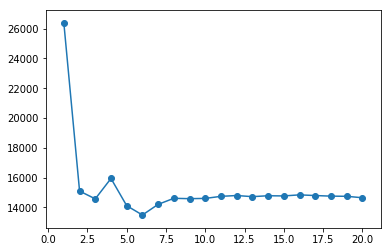

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hyper_params, mse_values)
plt.scatter(hyper_params, mse_values)

### 6.1.4.5 Varying features and hyperparameters

From the scatter plot, you can tell that the lowest MSE value was achieved at the k value of __6__. As we increased k past 6, the MSE actually increased and hovered but never decreased below 13657 (the approximate MSE value when k was 6).

Since varying the k value decreased the MSE value for this model, you may be wondering if repeating the grid search process for one of the models from the last mission that performed poorly when we fixed k to 5 would result in a lower MSE value. Let's try it out!

#### Instructions

* Use a for loop to iterate over hyper_params and in each iteration:
    * Instantiate a KNeighborsRegressor object with the following parameters:
        * n_neighbors: the current value for the iterator variable,
        * algorithm: brute
    * Fit the instantiated k-nearest neighbors model to all of the columns, except for the price column, from train_df
    * Use the trained model to make predictions on the same columns from test_df and assign to predictions.
    * Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.
    * Append the MSE value to mse_values.
* Use the scatter() method from matplotlib.pyplot to generate a line plot with:
    * hyper_params on the x-axis,
    * mse_values on the y-axis.
* Use plt.show() to display the line plot.

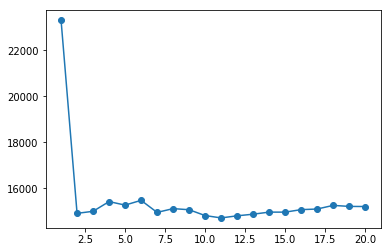

In [31]:
## features = train_df.columns.tolist()
## features.remove('price')
features = [col for col in train_df.columns if col != 'price']
hyper_params = range(1, 21)
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df['price'])
    mse_values.append(mse)
    
plt.scatter(hyper_params, mse_values)
plt.plot(hyper_params, mse_values)

### 6.1.4.6 Practice the workflow

You may have noticed that the general workflow for finding the best model is:

* select relevant features to use for predicting the target column.
* use grid search to find the optimal hyperparameter value for the selected features.
* evaluate the model's accuracy and repeat the process.

Let's now practice this workflow.

#### Instructions

* While using only the accommodates and bathrooms columns:

    * Train a model for each k value between 1 and 20 using the training data.
    * Use each model to make predictions on the test set (using just the accommodates and bathrooms columns).
    * Calculate each model's MSE value by comparing each set of predictions to the true price values.
    * Find the k value that obtained the lowest MSE value.
    * Create a dictionary named two_hyp_mse that contains 1 key-value pair:
        * key: k value that resulted in lowest MSE value.
        * value: corresponding MSE value.
* Repeat this process while using only the accommodates, bathrooms, and bedrooms columns:

    * Create a dictionary named three_hyp_mse that contains 1 key-value pair:
        * key: k value that resulted in lowest MSE value.
        * value: corresponding MSE value.
* Display both two_hyp_mse and three_hyp_mse using the print() function.

In [32]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)

two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

## two_hyp_mse[np.argmin(two_mse_values)+1] = min(two_mse_values)
for k,mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k + 1
    
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)
    
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

## three_hyp_mse[np.argmin(three_mse_values)+1] = min(three_mse_values)
for k,mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1

two_hyp_mse[two_lowest_k] = two_lowest_mse
three_hyp_mse[three_lowest_k] = three_lowest_mse

print(two_hyp_mse)
print(three_hyp_mse)

{5: 14790.314266211606}
{7: 13518.769009310208}


### 6.1.4.7 Next Steps

The first model, which used the accommodates and bathrooms columns, was able to achieve an MSE value of approximately 14790. The second model, which added the bedrooms column, was able to achieve an MSE value of approximately 13522.9, which is even lower than the lowest MSE value we achieved using the best model from the last mission (which used the accommodates, bedrooms, bathrooms, and number_of_reviews columns). Hopefully this demonstrates that using just one lever to find the best model isn't enough and you really want to use both levers in conjunction.

In this mission, we learned about hyperparameter optimization and the workflow of finding the optimal model to make predictions. Next in this course is a challenge, where you'll practice the concepts you've learned so far on a completely new dataset.

## 6.1.5 Cross Validation



### 6.1.5.1 Introduction

In an earlier mission, we learned about train/test validation, a simple technique for testing a machine learning model's accuracy on new data that the model wasn't trained on. In this mission, we'll focus on __more robust techniques__.

To start, we'll focus on the __holdout validation__ technique, which involves:

* splitting the full dataset into 2 partitions:
* a training set
* a test set
* training the model on the training set,
* using the trained model to predict labels on the test set,
* computing an error metric to understand the model's effectiveness,
* switch the training and test sets and repeat,
* average the errors.

In holdout validation, we usually use a __50/50 split instead of the 75/25 split__ from train/test validation. This way, we remove number of observations as a potential source of variation in our model performance.

![img alt](https://s3.amazonaws.com/dq-content/holdout_validation.png)


Let's start by splitting the data set into 2 nearly equivalent halves.

#### Instructions

* Use the numpy.random.permutation() function to shuffle the ordering of the rows in dc_listings.
* Select the first 1862 rows and assign to split_one.
* Select the remaining 1861 rows and assign to split_two.

In [33]:
import numpy as np
import pandas as pd

dc_listings = pd.read_csv("Data/dc_airbnb.csv")
#### regex: dc_listings['price'] = dc_listings['price'].str.replace(r"[\$,]", '').astype('float')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
np.random.seed(1)
shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)

split_one = dc_listings.iloc[0:1862] ### if using .lic for slicing operation, both boundary sides are included, which may throw an eror here
split_two = dc_listings.iloc[1862:] ### Also, .loc is label based selection, here the label is not in order any more due to the permutation.

### 6.1.5.2 Holdout Validation

Now that we've split our data set into 2 dataframes, let's:

* train a k-nearest neighbors model on the first half,
* test this model on the second half,
* train a k-nearest neighbors model on the second half,
* test this model on the first half.

#### Instructions

* Train a k-nearest neighbors model using the default algorithm (auto) and the default number of neighbors (5) that:
    * Uses the accommodates column from train_one for training and
    * Tests it on test_one.
* Assign the resulting RMSE value to iteration_one_rmse.
* Train a k-nearest neighbors model using the default algorithm (auto) and the default number of neighbors (5) that:
    * Uses the accommodates column from train_two for training and
    * Tests it on test_two.
* Assign the resulting RMSE value to iteration_two_rmse.
* Use numpy.mean() to calculate the average of the 2 RMSE values and assign to avg_rmse.

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
knn.fit(train_one[['accommodates']], train_one['price'])
predicted_price = knn.predict(test_one[['accommodates']])
iteration_one_rmse = np.sqrt(mean_squared_error(predicted_price, test_one['price']))

knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
knn.fit(train_two[['accommodates']], train_two['price'])
predicted_price = knn.predict(test_two[['accommodates']])
iteration_two_rmse = np.sqrt(mean_squared_error(predicted_price, test_two['price']))
avg_rmse = np.mean([iteration_one_rmse, iteration_two_rmse])
avg_rmse

128.96254732948216

### 6.1.5.3 K-Fold Cross Validation

If we average the two RMSE values from the last step, we get an RMSE value of approximately 128.96. Holdout validation is actually a specific example of a larger class of validation techniques called __k-fold cross-validation__. While holdout validation is better than train/test validation because the model isn't repeatedly biased towards a specific subset of the data, both models that are trained only use half the available data. K-fold cross validation, on the other hand, takes advantage of a larger proportion of the data during training while still __rotating through__ different subsets of the data to avoid the issues of train/test validation.

Here's the algorithm from k-fold cross validation:

* splitting the full dataset into k equal length partitions.
    * selecting k-1 partitions as the training set and
    * selecting the remaining partition as the test set
* training the model on the training set.
* using the trained model to predict labels on the test fold.
* computing the test fold's error metric.
* repeating all of the above steps k-1 times, until each partition has been used as the test set for an iteration.
* calculating the mean of the k error values.

__Holdout validation__ is essentially a version of k-fold cross validation when __k is equal to 2__. Generally, 5 or 10 folds is used for k-fold cross-validation. Here's a diagram describing each iteration of 5-fold cross validation:

![img alt](https://s3.amazonaws.com/dq-content/kfold_cross_validation.png)

As you increase the number the folds, the number of observations in each fold decreases and the variance of the fold-by-fold errors increases. Let's start by manually partitioning the data set into 5 folds. Instead of splitting into 5 dataframes, let's add a column that specifies which fold the row belongs to. This way, we can easily select

#### Instructions

* Add a new column to dc_listings named fold that contains the fold number each row belongs to:
    * Fold 1 should have rows from index 0 up to745, not including 745.
    * Fold 2 should have rows from index 745 up to 1490, not including 1490.
    * Fold 3 should have rows from index 1490 up to 2234, not including 2234.
    * Fold 4 should have rows from index 2234 up to 2978, not including 2978.
    * Fold 5 should have rows from index 2978 up to 3723, not including 3723.
* Display the unique value counts for the fold column to confirm that each fold has roughly the same number of elements.
* Display the number of missing values in the fold column to confirm we didn't miss any rows.

In [35]:
## continue with last mission where dc_listings has been randomly permutated with seed=1
dc_listings.loc[dc_listings.index[0:745], "fold"] = 1 #### Neat!!!
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

print(dc_listings['fold'].value_counts())
print("\n Num of missing values: ", dc_listings['fold'].isnull().sum())

5.0    745
2.0    745
1.0    745
4.0    744
3.0    744
Name: fold, dtype: int64

 Num of missing values:  0


In [36]:
#### Testing Broadcasting while assign values to Series
df1=pd.DataFrame({'A':[1, 2, 3, 4, 5]})
display(df1)
df1['B'] = 0
df1['C'] = None
df1.loc[df1.index[0:1], 'D'] = 1
display(df1)
df1.isnull().sum()

,A
0,1
1,2
2,3
3,4
4,5


,A,B,C,D
0,1,0,None,1.0
1,2,0,None,NaN
2,3,0,None,NaN
3,4,0,None,NaN
4,5,0,None,NaN


A    0
B    0
C    5
D    4
dtype: int64

### 6.1.5.4 First iteration

Let's start by performing the first iteration of k-fold cross validation on a simple, univariate model.

#### Instructions

* Train a k-nearest neighbors model using the accommodates column as the sole feature from folds 2 to 5 as the training set.
* Use the model to make predictions on the test set (accommodates column from fold 1) and assign the predicted labels to labels.
* Calculate the RMSE value by comparing the price column with the predicted labels.
* Assign the RMSE value to iteration_one_rmse.

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Training
model = KNeighborsRegressor()
train_iteration_one = dc_listings[dc_listings["fold"] != 1]
test_iteration_one = dc_listings[dc_listings["fold"] == 1]
model.fit(train_iteration_one[["accommodates"]], train_iteration_one["price"])

# Predicting
labels = model.predict(test_iteration_one[["accommodates"]])
test_iteration_one["predicted_price"] = labels
iteration_one_mse = mean_squared_error(test_iteration_one["price"], test_iteration_one["predicted_price"])
iteration_one_rmse = np.sqrt(iteration_one_mse)
display(iteration_one_rmse)

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


107.04609155929425

### 6.1.5.5 Function for training models

From the first iteration, we achieved an RMSE value of 107. Let's calculate the RMSE values for the remaining iterations. To make the iteration process easier, let's __wrap the code__ we wrote in the previous screen in a function.

#### Instructions

* Write a function named train_and_validate that takes in a dataframe as the first parameter (df) and a list of fold values (1 to 5 in our case) as the second parameter (folds). This function should:

    * Train n models (where n is number of folds) and perform k-fold cross validation (using n folds). Use the default k value for the KNeighborsRegressor class.
    * Return a list of RMSE values, where the first element is the RMSE for when fold 1 was the test set, the second element is the RMSE for when fold 2 was the test set, and so on.

* Use the train_and_validate function to return the list of RMSE values for the dc_listings Dataframe and assign to rmses.

* Calculate the mean of these values and assign to avg_rmse.
* Display both rmses and avg_rmse.

In [38]:
# Use np.mean to calculate the mean.
import numpy as np
fold_ids = [1,2,3,4,5]
def train_and_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        # Train
        model = KNeighborsRegressor()
        train = df[df["fold"] != fold]
        test = df[df["fold"] == fold]
        model.fit(train[["accommodates"]], train["price"])
        # Predict
        labels = model.predict(test[["accommodates"]])
        test["predicted_price"] = labels
        mse = mean_squared_error(test["price"], test["predicted_price"])
        rmse = mse**(1/2)
        fold_rmses.append(rmse)
    return(fold_rmses)

rmses = train_and_validate(dc_listings, fold_ids)
print(rmses)
avg_rmse = np.mean(rmses)
print(avg_rmse)

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[107.04609155929425, 136.62225078440179, 153.02733626761361, 107.39207160219395, 146.92428383765579]
130.20240681


### 6.1.5.6 Performing K-Fold Cross Validation Using Scikit-Learn

While the average RMSE value was approximately 130.2, the RMSE values ranged from 107 to 153. This large amount of variability between the RMSE values means that we're __either using a poor model or a poor evaluation criteria (or a bit of both!)__. By implementing your own k-fold cross-validation function, you hopefully acquired a good understanding of the inner workings of the technique. The function we wrote, however, has many limitations. If we want to now change the number of folds we want to use, we need to make the function more general so it can also handle randomizing the ordering of the rows in the dataframe and splitting into folds.

In machine learning, we're interested in building a good model and accurately understanding how well it will perform. To build a better k-nearest neighbors model, we can change the features it uses or tweak the number of neighbors (a hyperparameter). To accurately understand a model's performance, we can perform k-fold cross validation and select the proper number of folds. We've learned how scikit-learn makes it easy for us to quickly experiment with these different knobs when it comes to building a better model. Let's now dive into how we can use scikit-learn to handle cross-validation as well.

First, we instantiate an instance of the __[KFold class](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)__ from sklearn.model_selection:

```python
from sklearn.model_selection import KFold
kf = KFold(n_splits, shuffle=False, random_state=None)
```

where:

* n_splits is the number of folds you want to use,
* shuffle is used to toggle shuffling of the ordering of the observations in the dataset,
* random_state is used to specify the random seed value if shuffle is set to True.

You'll notice here that no parameters depend on the data set at all. This is because the KFold class returns an __iterator__ object which we use in conjunction with the __[cross_val_score() function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)__, also from __sklearn.model_selection__. Together, these 2 functions allow us to compactly train and test using k-fold cross validation:

Here are the relevant parameters for the __cross_val_score function__:

```python
from sklearn.model_selection import cross_val_score
cross_val_score(estimator, X, Y, scoring=None, cv=None)
```

where:

* estimator is a sklearn model that implements the fit method (e.g. instance of KNeighborsRegressor),
* X is the list or 2D array containing the features you want to train on,
* y is a list containing the values you want to predict (target column),
* scoring is a string describing the scoring criteria (list of accepted values __[here](http://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)__).
* cv describes the number of folds. Here are some examples of accepted values:
    * an instance of the KFold class,
    * an integer representing the number of folds.

Depending on the scoring criteria you specify, a single total value is returned for each fold. Here's the general workflow for performing k-fold cross-validation using the classes we just described:

* instantiate the scikit-learn model class you want to fit,
* instantiate the KFold class and using the parameters to specify the k-fold cross-validation attributes you want,
* use the cross_val_score() function to return the scoring metric you're interested in.

#### Instructions

* Create a new instance of the KFold class with the following properties:

    * 5 folds,
    * shuffle set to True,
    * random seed set to 1 (so we can answer check using the same seed),
    * assigned to the variable kf.

* Create a new instance of the KNeighborsRegressor class and assign to knn.

* Use the cross_val_score() function to perform k-fold cross-validation:

    * using the KNeighborsRegressor instance knn,
    * using the accommodates column for training,
    * using the price column as the target column,
    * returning an array of MSE values (one value for each fold).

* Assign the resulting list of MSE values to mses. Then, take the absolute value followed by the square root of each MSE value. Then, calculate the average of the resulting RMSE values and assign to avg_rmse.

In [39]:
from sklearn.model_selection import cross_val_score, KFold
### Regarding the parameter 'scoring': why negative?? convention ---> the higher the better

kf = KFold(n_splits=5, shuffle=True, random_state=1)
knn = KNeighborsRegressor()
mses = cross_val_score(knn, dc_listings[['accommodates']], dc_listings['price'], scoring='neg_mean_squared_error', cv=kf)
display(mses)
rmses = np.sqrt(np.abs(mses))
avg_rmse = np.mean(rmses)
display(avg_rmse)

array([-18950.25567785, -22382.62416107, -17724.9870604 , -10639.59569892,
       -22429.3527957 ])

134.66322485283825

### 6.1.5.7 Exploring Different K Values (K folds not K neighbor)

Choosing the __right k value__ when performing __k-fold__ cross validation is __more of an art and less of a science__. As we discussed earlier in the mission, a k value of __2__ is really just __holdout validation__. On the other end, setting k equal to n (the number of observations in the data set) is known as __leave-one-out__ cross validation, or __LOOCV__ for short. Through lots of __trial and error__, data scientists have __converged on 10__ as the standard k value.

In the following code block, we display the results of __varying k from 3 to 23__. For each k value, we calculate and display the __average__ RMSE value across all of the folds and the __standard deviation__ of the RMSE values. Across the many different k values, it seems like the average RMSE value is around 128. You'll notice that the standard deviation of the RMSE increases from approximately 1.1 to 37.3 as we increase the number the folds.

In [40]:
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  126.192234742 std RMSE:  1.10699117395
5 folds:  avg RMSE:  134.663224853 std RMSE:  17.0639664505
7 folds:  avg RMSE:  128.761029407 std RMSE:  15.1130364721
9 folds:  avg RMSE:  130.97403955 std RMSE:  17.5527278118
10 folds:  avg RMSE:  129.382430039 std RMSE:  22.8580286103
11 folds:  avg RMSE:  128.520917482 std RMSE:  21.0393369592
13 folds:  avg RMSE:  128.665369279 std RMSE:  29.931738536
15 folds:  avg RMSE:  127.74903938 std RMSE:  30.2252052501
17 folds:  avg RMSE:  125.086899801 std RMSE:  34.7037432777
19 folds:  avg RMSE:  123.249524373 std RMSE:  37.9325864603
21 folds:  avg RMSE:  129.742921534 std RMSE:  36.3109063433
23 folds:  avg RMSE:  129.910388399 std RMSE:  37.3486155888


### 6.1.5.8 Bias-Variance Tradeoff

So far, we've been working under the assumption that a lower RMSE always means that a model is more accurate. This isn't the complete picture, unfortunately. A model has two sources of error, __bias and variance__.

Bias describes error that results in bad assumptions about the learning algorithm. For example, assuming that only one feature, like a car's weight, relates to a car's fuel efficiency will lead you to fit a simple, univariate regression model that will result in high bias. The error rate will be high since a car's fuel efficiency is affected by many other factors besides just its weight.

Variance describes error that occurs because of the __variability__ of a model's predicted values. If we were given a dataset with 1000 features on each car and used every single feature to train an incredibly complicated multivariate regression model, we will have low bias but high variance. In an ideal world, we want low bias and low variance but in reality, __there's always a tradeoff__.

<span style="color:red">The standard deviation of the RMSE values can be a proxy for a model's variance while the average RMSE is a proxy for a model's bias</span>. Bias and variance are the 2 observable sources of error in a model that we can indirectly control.

![img alt](https://s3.amazonaws.com/dq-content/bias_variance.png)

While k-nearest neighbors can make predictions, __it isn't a mathematical model__. A mathematical model is usually an equation that can __exist without the original data__, which isn't true with k-nearest neighbors. In the next two courses, we'll learn about a mathematical model called linear regression. We'll explore the bias-variance tradeoff in greater depth in these next 2 courses because of its importance when working with mathematical models in particular.

### 6.1.5.9 Next Steps

In this mission, we explored more robust cross validation techniques like holdout validation and k-fold cross-validation. Next in this course is a guided project where you can practice what you've learned in this course on a different data set.